# Plotting degrees of polynomials required for perturbation

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='sans-serif'#使用するフォント
# plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 16 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ

## Filetering polynomial

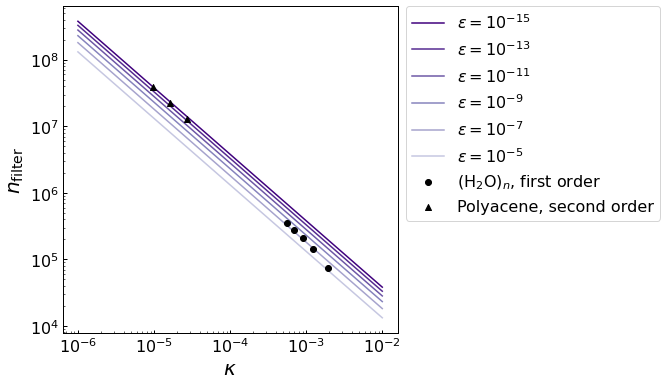

In [2]:
import numpy as np
from cost_estimate import get_n_filter

epsilon_list = np.logspace(-15, -5, 6)
kappa = np.logspace(-6, -2, 100)

H2O_points_first_order = [(0.001949, 73664), (0.0012321, 142814), (0.00089447,205657), (0.0006991, 271645), (0.0005562, 351282)]
polyacene_points_second_order = [(2.7287e-5,12835480), (1.60299e-5,22654885), (9.690507601963462e-06, 38654744)]

fig = plt.figure(figsize=(6, 6))
for i in range(len(epsilon_list)):
    color = plt.cm.Purples(-np.log(epsilon_list[i])/np.max(-np.log(epsilon_list)))  # Get the color based on the parameter using the Reds colormap
    plt.plot(kappa, np.real(get_n_filter(epsilon_list[i], kappa, 1e-6)), color=color, label=r"$\varepsilon=10^{"+f"{int(np.round(np.log10(epsilon_list[i])))}"+"}$")

H2O_points_first_order = np.array(H2O_points_first_order)
polyacene_points_second_order = np.array(polyacene_points_second_order)
plt.scatter(H2O_points_first_order[:,0], H2O_points_first_order[:,1], color="black", marker="o", label="$(\mathrm{H_2O})_n$, first order", zorder=2)
plt.scatter(polyacene_points_second_order[:,0], polyacene_points_second_order[:,1], color="black", marker="^", label="Polyacene, second order", zorder=2)

plt.xlabel('$\kappa$', fontsize=20)
plt.ylabel('$n_{\mathrm{filter}}$', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.025))
plt.xscale("log")
plt.yscale("log")
plt.savefig("filtering.pdf", bbox_inches="tight")
plt.show()

## Perturbation polynomial

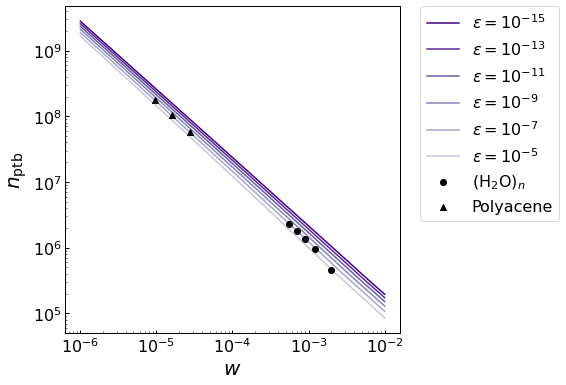

In [3]:
import numpy as np
from cost_estimate import get_n_ptb

epsilon_list = np.logspace(-15, -5, 6)
w = np.logspace(-6, -2, 100)

H2O_points = [(0.0019497080245570824, 458388), (0.0012321826788897685, 941380), (0.0008944783742852222, 1349132), (0.0006991122173381067, 1774774), (0.0005562915466404996, 2291113)]
polyacene_points = [(2.7287787885569258e-05, 58372415), (1.6029944943964776e-05, 104425220), (9.690507617964717e-06, 175552437)]

fig = plt.figure(figsize=(6, 6))
for i in range(len(epsilon_list)):
    color = plt.cm.Purples(-np.log(epsilon_list[i])/np.max(-np.log(epsilon_list)))  # Get the color based on the parameter using the Reds colormap
    nptb = [np.real(get_n_ptb(epsilon_list[i], _w, 1e-6)) for _w in w]
    plt.plot(w, nptb, color=color, label=r"$\varepsilon=10^{"+f"{int(np.round(np.log10(epsilon_list[i])))}"+"}$")

H2O_points = np.array(H2O_points)
polyacene_points = np.array(polyacene_points)
plt.scatter(H2O_points[:,0], H2O_points[:,1], color="black", marker="o", label="$(\mathrm{H_2O})_n$", zorder=2)
plt.scatter(polyacene_points[:,0], polyacene_points[:,1], color="black", marker="^", label="Polyacene", zorder=2)

plt.xlabel('$w$', fontsize=20)
plt.ylabel('$n_{\mathrm{ptb}}$', fontsize=20)
plt.legend(bbox_to_anchor=(1.5, 1.025))
plt.xscale("log")
plt.yscale("log")
plt.savefig("ptb.pdf", bbox_inches="tight")
plt.show()